In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
%cd /content/drive/MyDrive/anime

/content/drive/MyDrive/anime


# Data Pre-processing

In [ ]:
df=pd.read_csv("rating_complete.csv")

In [ ]:
# data shape
df.shape

(57633278, 3)

In [ ]:
# 결측값 존재 확인
df.isnull().sum()
df.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

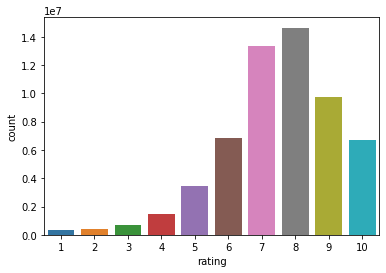

In [ ]:
# 각 rating 별 평가 개수
sns.countplot(x='rating',data=df)

In [ ]:
# 가장 많이 평가된 anime top10
top_10=np.array(df['anime_id'].value_counts().sort_values(ascending=False).head(10).index)

In [ ]:
filtered_rating=df[df['anime_id'].isin(top_10)]

In [ ]:
filtered_rating

,user_id,anime_id,rating
61,1,6547,6
70,1,1575,10
79,1,5114,10
83,1,1535,9
98,1,4224,9
...,...,...,...
57633193,353403,22319,8
57633198,353403,11757,10
57633202,353403,16498,9
57633210,353403,19815,9


In [ ]:
# filtered data shape
filtered_rating.shape

(1458255, 3)

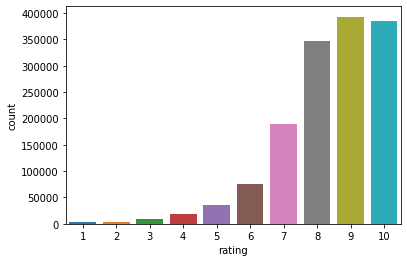

In [ ]:
sns.countplot(x='rating',data=filtered_rating)

In [ ]:
# 평점을 9이상 받은 anime
filtered_rating[filtered_rating['rating']>=9].count()

user_id     778102
anime_id    778102
rating      778102
dtype: int64

In [ ]:
# information for anime
anime_df=pd.read_csv('anime.csv')

In [ ]:
anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [ ]:
# top 10 anime에 대한 데이터만 가져오기
anime_names = anime_df[anime_df['MAL_ID'].isin(top_10)]

In [ ]:
anime_names.head(10)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
1393,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,デスノート,TV,37,"Oct 4, 2006 to Jun 27, 2007",Fall 2006,...,557406.0,535252.0,415890.0,201522.0,68577.0,28048.0,10462.0,3692.0,2256.0,3586.0
1431,1575,Code Geass: Hangyaku no Lelouch,8.72,"Action, Military, Sci-Fi, Super Power, Drama, ...",Code Geass:Lelouch of the Rebellion,コードギアス 反逆のルルーシュ,TV,25,"Oct 6, 2006 to Jul 29, 2007",Fall 2006,...,326710.0,309688.0,213516.0,93305.0,31697.0,14686.0,7065.0,3100.0,1630.0,2621.0
3564,4224,Toradora!,8.24,"Slice of Life, Comedy, Romance, School",Toradora!,とらドラ！,TV,25,"Oct 2, 2008 to Mar 26, 2009",Fall 2008,...,185286.0,255249.0,273494.0,160797.0,58749.0,25479.0,10810.0,4372.0,2456.0,2890.0
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,...,714811.0,401507.0,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0
4636,6547,Angel Beats!,8.15,"Action, Comedy, Drama, School, Supernatural",Angel Beats!,Angel Beats!（エンジェルビーツ）,TV,13,"Apr 3, 2010 to Jun 26, 2010",Spring 2010,...,200757.0,242398.0,264330.0,169476.0,68296.0,31152.0,14127.0,5810.0,2758.0,2569.0
6614,11757,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",Sword Art Online,ソードアート・オンライン,TV,25,"Jul 8, 2012 to Dec 23, 2012",Summer 2012,...,241049.0,236672.0,305386.0,303813.0,188431.0,124819.0,81155.0,44204.0,25371.0,23472.0
7449,16498,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan,進撃の巨人,TV,25,"Apr 7, 2013 to Sep 29, 2013",Spring 2013,...,470882.0,514879.0,459113.0,220228.0,70768.0,31141.0,11805.0,4637.0,2707.0,4939.0
8148,19815,No Game No Life,8.2,"Game, Adventure, Comedy, Supernatural, Ecchi, ...","No Game, No Life",ノーゲーム・ノーライフ,TV,12,"Apr 9, 2014 to Jun 25, 2014",Spring 2014,...,227827.0,285623.0,309230.0,186864.0,70141.0,30284.0,14345.0,6228.0,3313.0,3521.0
8646,22319,Tokyo Ghoul,7.81,"Action, Mystery, Horror, Psychological, Supern...",Tokyo Ghoul,東京喰種-トーキョーグール-,TV,12,"Jul 4, 2014 to Sep 19, 2014",Summer 2014,...,190342.0,250814.0,348603.0,261579.0,112177.0,51649.0,24805.0,10284.0,5144.0,4794.0
10451,30276,One Punch Man,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",One Punch Man,ワンパンマン,TV,12,"Oct 5, 2015 to Dec 21, 2015",Fall 2015,...,360187.0,465041.0,403832.0,172181.0,47365.0,17873.0,5706.0,2279.0,1448.0,2733.0


In [ ]:
anime_dic=dict(zip(anime_names["MAL_ID"],anime_names["Name"]))

In [ ]:
anime_dic

{1535: 'Death Note',
 1575: 'Code Geass: Hangyaku no Lelouch',
 4224: 'Toradora!',
 5114: 'Fullmetal Alchemist: Brotherhood',
 6547: 'Angel Beats!',
 11757: 'Sword Art Online',
 16498: 'Shingeki no Kyojin',
 19815: 'No Game No Life',
 22319: 'Tokyo Ghoul',
 30276: 'One Punch Man'}

In [ ]:
filtered_rating['title']=filtered_rating['anime_id'].apply(lambda x: anime_dic[x])

In [ ]:
filtered_rating

,user_id,anime_id,rating,title
61,1,6547,6,Angel Beats!
70,1,1575,10,Code Geass: Hangyaku no Lelouch
79,1,5114,10,Fullmetal Alchemist: Brotherhood
83,1,1535,9,Death Note
98,1,4224,9,Toradora!
...,...,...,...,...
57633193,353403,22319,8,Tokyo Ghoul
57633198,353403,11757,10,Sword Art Online
57633202,353403,16498,9,Shingeki no Kyojin
57633210,353403,19815,9,No Game No Life


In [ ]:
# obtain rewards
filtered_rating['reward']=filtered_rating['rating'].apply(lambda x: 0 if x<10 else 1)

In [ ]:
filtered_rating

,user_id,anime_id,rating,title,reward
61,1,6547,6,Angel Beats!,0
70,1,1575,10,Code Geass: Hangyaku no Lelouch,1
79,1,5114,10,Fullmetal Alchemist: Brotherhood,1
83,1,1535,9,Death Note,0
98,1,4224,9,Toradora!,0
...,...,...,...,...,...
57633193,353403,22319,8,Tokyo Ghoul,0
57633198,353403,11757,10,Sword Art Online,1
57633202,353403,16498,9,Shingeki no Kyojin,0
57633210,353403,19815,9,No Game No Life,0


In [ ]:
column_titles = ['user_id','anime_id','title','rating','reward']

filtered_rating.reindex(columns=column_titles)

,user_id,anime_id,title,rating,reward
61,1,6547,Angel Beats!,6,0
70,1,1575,Code Geass: Hangyaku no Lelouch,10,1
79,1,5114,Fullmetal Alchemist: Brotherhood,10,1
83,1,1535,Death Note,9,0
98,1,4224,Toradora!,9,0
...,...,...,...,...,...
57633193,353403,22319,Tokyo Ghoul,8,0
57633198,353403,11757,Sword Art Online,10,1
57633202,353403,16498,Shingeki no Kyojin,9,0
57633210,353403,19815,No Game No Life,9,0


In [ ]:
filtered_rating.head()

,user_id,anime_id,rating,title,reward
61,1,6547,6,Angel Beats!,0
70,1,1575,10,Code Geass: Hangyaku no Lelouch,1
79,1,5114,10,Fullmetal Alchemist: Brotherhood,1
83,1,1535,9,Death Note,0
98,1,4224,9,Toradora!,0


In [ ]:
# calculating the most liked anime out of the top 10 most reviewed movies
groups=filtered_rating.groupby("title")

In [ ]:
anime_title=[]
anime_liked_percentage=[]
for title, title_df in groups:
    anime_title.append(title)
    anime_liked_percentage.append((np.sum(title_df["reward"])/len(title_df))*100)

In [ ]:
liked_per_dic=dict(zip(anime_title,anime_liked_percentage))

In [ ]:
liked_per_dic

{'Angel Beats!': 22.26292630042444,
 'Code Geass: Hangyaku no Lelouch': 33.99713018333321,
 'Death Note': 32.22864976010966,
 'Fullmetal Alchemist: Brotherhood': 52.59208477089652,
 'No Game No Life': 21.121782201241775,
 'One Punch Man': 24.74014569116927,
 'Shingeki no Kyojin': 25.831890408377213,
 'Sword Art Online': 16.521291379224774,
 'Tokyo Ghoul': 12.601884771234728,
 'Toradora!': 21.73120628080635}

Text(0.5, 1.0, 'Liked Percentage of Top 10 Most Reviewd Anime')

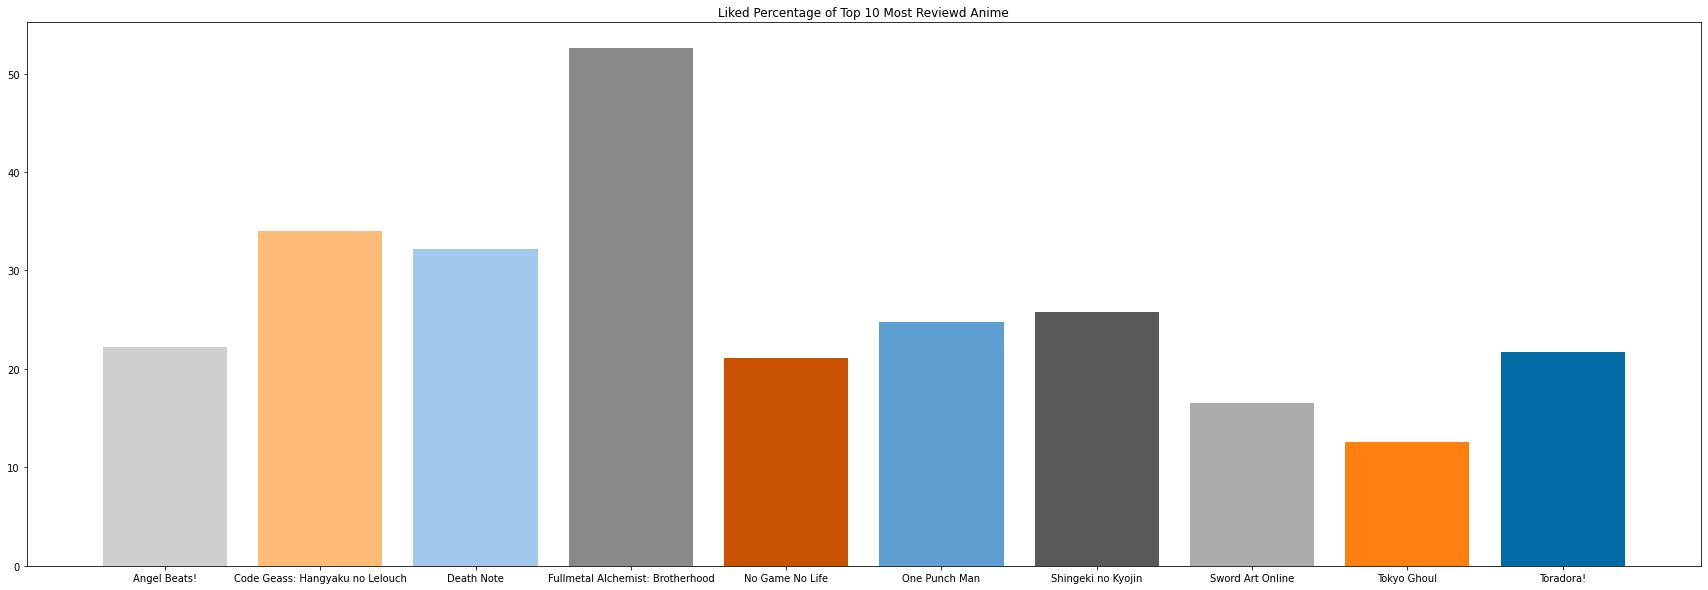

In [ ]:
#color codes
c= ['#cfcfcf', '#ffbc79', '#a2c8ec', '#898989', '#c85200',
                          '#5f9ed1', '#595959', '#ababab', '#ff800e', '#006ba4']

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.bar(anime_title,height=anime_liked_percentage,color=c)
plt.title("Liked Percentage of Top 10 Most Reviewd Anime")

In [ ]:
# save filtered data
filtered_rating.to_csv('final_anime.csv')

In [ ]:
# obtain liked percentage per anime
liked_per=pd.DataFrame.from_dict(liked_per_dic,orient="index")
liked_per.to_csv("liked_per.csv")

In [ ]:
anime_id_name=pd.DataFrame.from_dict(anime_dic,orient="index")
anime_id_name.to_csv("anime_id_name.csv")

In [ ]:
filtered_rating.head()

,user_id,anime_id,rating,title,reward
61,1,6547,6,Angel Beats!,0
70,1,1575,10,Code Geass: Hangyaku no Lelouch,1
79,1,5114,10,Fullmetal Alchemist: Brotherhood,1
83,1,1535,9,Death Note,0
98,1,4224,9,Toradora!,0


# Implement algorithms

In [ ]:
dataset = pd.read_csv("final_anime.csv")

In [ ]:
print(dataset.head())
print(dataset.shape)

   Unnamed: 0  user_id  anime_id  rating                             title  \
0          61        1      6547       6                      Angel Beats!   
1          70        1      1575      10   Code Geass: Hangyaku no Lelouch   
2          79        1      5114      10  Fullmetal Alchemist: Brotherhood   
3          83        1      1535       9                        Death Note   
4          98        1      4224       9                         Toradora!   

   reward  
0       0  
1       1  
2       1  
3       0  
4       0  
(1458255, 6)


In [ ]:
# mapping anime_id to anime title
anime_id_name=pd.read_csv("anime_id_name.csv")
anime_id_name.columns=["anime_id","anime_title"]

In [ ]:
anime_id_name

,anime_id,anime_title
0,1535,Death Note
1,1575,Code Geass: Hangyaku no Lelouch
2,4224,Toradora!
3,5114,Fullmetal Alchemist: Brotherhood
4,6547,Angel Beats!
5,11757,Sword Art Online
6,16498,Shingeki no Kyojin
7,19815,No Game No Life
8,22319,Tokyo Ghoul
9,30276,One Punch Man


In [ ]:
anime_id=anime_id_name["anime_id"]
anime_title=anime_id_name["anime_title"]
anime_id_name=dict(zip(anime_id,anime_title))

In [ ]:
# mapping anime title to anime liked percentage
liked_per=pd.read_csv("liked_per.csv")
liked_per.columns=["anime_title","liked_percentage"]

In [ ]:
liked_per

,anime_title,liked_percentage
0,Angel Beats!,22.262926
1,Code Geass: Hangyaku no Lelouch,33.997130
2,Death Note,32.228650
3,Fullmetal Alchemist: Brotherhood,52.592085
4,No Game No Life,21.121782
5,One Punch Man,24.740146
6,Shingeki no Kyojin,25.831890
7,Sword Art Online,16.521291
8,Tokyo Ghoul,12.601885
9,Toradora!,21.731206


In [ ]:
anime_title=liked_per["anime_title"]
anime_liked_per=liked_per["liked_percentage"]
liked_per=dict(zip(anime_title,anime_liked_per))

In [ ]:
# defining logged data- contains only sequences of anime id/rewards
# 2 columns- anime_id, reward

logged_data=dataset.drop(labels=["Unnamed: 0","user_id","rating","title"],axis=1,inplace=False)

In [ ]:
dataset.head()

,Unnamed: 0,user_id,anime_id,rating,title,reward
0,61,1,6547,6,Angel Beats!,0
1,70,1,1575,10,Code Geass: Hangyaku no Lelouch,1
2,79,1,5114,10,Fullmetal Alchemist: Brotherhood,1
3,83,1,1535,9,Death Note,0
4,98,1,4224,9,Toradora!,0


In [ ]:
logged_data.head()

,anime_id,reward
0,6547,0
1,1575,1
2,5114,1
3,1535,0
4,4224,0


In [ ]:
logged_data.shape

(1458255, 2)

In [ ]:
# dictionary mapping arm number to anime id
anime_arm_id=dict(zip([i for i in range(10)],anime_id))

In [ ]:
anime_arm_id

{0: 1535,
 1: 1575,
 2: 4224,
 3: 5114,
 4: 6547,
 5: 11757,
 6: 16498,
 7: 19815,
 8: 22319,
 9: 30276}

# MAB Algorithms

In [ ]:
def normalise(array):
    maximum=max(array)
    minimum=min(array)
    for i in range(len(array)):
        array[i]=(array[i]-minimum)/(maximum-minimum)
    return array

## Epsilon Greedy

In [ ]:
def epsilon_greedy(k,eps,valid_recommendations,anime_arm_id,logged_data):
    
    # k : number of arms/number of total anime to be recommended
    # eps : exploration fraction-> algorithm will explore with a probability of eps and exploit with a probability of (1-eps)
    # valid_recommendations : total number of recommendations to be simulated in the online evaluation
    # anime_arm_id : dictionary mapping arm number to anime id 
    # logged_data : data log to simulate online evaluation through the offline replayer method

    if len(anime_arm_id)!=k: 
        print("The length of list of anime id's passed does not match the number of arms entered \n")
        return
    
    q = np.zeros(k)                   # the array of the estimated expected values of each arm/anime
    recommendations = 0               # 총 추천 횟수
    anime_recom_number = np.zeros(k)  # 각 애니메이션이 추천된 횟수 저장
    reward = 0                        # 현재의 추천으로 얻은 보상
    a = 0                             # 현재 추천하는 애니메이션
    total_reward = 0                  # 총 보상
    avg_reward = np.zeros(valid_recommendations) # 현재까지의 추천 당 평균 보상
    
    while(recommendations != valid_recommendations): # 설정한 추천 횟수에 도달할 때까지 진행
        
        # drawing sample of size k times more than logged_data with replacement to implement bootstrapping
        sample = logged_data.sample(frac = k, replace=True)
        
        for i in range(len(sample)):
            
            # select arm
            p = np.random.rand() # randomly generates a number between 0 and 1
        
            if eps == 0 and recommendations == 0: # eps value indicated exploitation but since the reccomendations made are also zero there is no knowledge to exploit-randomly select any arm
                a = np.random.choice(k) # anime is chosen
        
            elif p > eps: # case of exploration
                a = np.argmax(q) # recommends the anime with the highest estimated expected value at current moment of time
            
            else: # case of exploitation
                a = np.random.choice(k) # anime is chosen randomly
            
            # checking if this recommendation is valid 
            
            if(sample.iloc[i][0]==anime_arm_id[a]): # valid point->consider this for evaluation
                
                # storing the corresponding reward
                reward = sample.iloc[i][1]
                
                # updating counts
                recommendations+=1
                anime_recom_number[a]+=1
                
                # updating the rewards
                total_reward+=reward
                avg_reward[recommendations-1] = total_reward/recommendations
                
                # updating estimated expected value of the recommended anime
                q[a]=((q[a]*(anime_recom_number[a]-1))+reward)/anime_recom_number[a]
                
                if(recommendations==valid_recommendations): # stops the evaluation if valid number of recommendations have been made
                    break
                
        
    avg_reward = normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    best = np.argmax(q)
    
    # returns the estimated expected values of all thr anime after all the recommendations
    # the average normalised reward per iteration at each iteration
    # the number of recommendations made for each anime
    # the best anime arm number
    
    return best, q, avg_reward, anime_recom_number 

In [ ]:
def ucb_1(k,valid_recommendations,anime_arm_id,logged_data):

    if len(anime_arm_id)!=k: 
        print("The length of list of anime id's passed does not match the number of arms entered \n")
        return
    
    q = np.zeros(k)                   # the array of the estimated expected values of each arm/anime
    recommendations = 0               # 총 추천 횟수
    anime_recom_number=np.zeros(k)    # 각 애니메이션이 추천된 횟수 저장
    reward=0                          # 현재의 추천으로 얻은 보상
    a=0                               # 현재 추천하는 애니메이션
    total_reward = 0                  # 총 보상
    avg_reward=np.zeros(valid_recommendations) # the average reward per recommendation till the current recommendation
    round = 0

    # first each anime has to be recommended once
    for a in range(k): # for each anime
        round+=1
        # filtering data of "anime a" from logged data
        filt=(logged_data["anime_id"]==anime_arm_id[a]) 
        a_data=logged_data[filt]
        
        # choosing a random row in the filtered data
        i=np.random.choice(len(a_data))
        reward=a_data.iloc[i][1] # storing the reward for the particular anime

        # updating counts
        recommendations+=1
        anime_recom_number[a]+=1
                
        # updating the rewards
        total_reward+=reward
        avg_reward[recommendations-1]=total_reward/recommendations
                
        # updating estimated expected value of the recommended anime
        q[a]=((q[a]*(anime_recom_number[a]-1))+reward)/anime_recom_number[a]
        
    
    # now each anime has been recommended once, continuing with the algorithm
    while(recommendations!=valid_recommendations):
        
        # drawing sample of size k times more than logged_data with replacement to implement bootstrapping
        sample=logged_data.sample(frac=k,replace=True)
        
        for i in range(len(sample)):
            round+=1
            # select arm 
            upper_bound_arm = q + np.sqrt(np.divide(2*np.log10(round),anime_recom_number))
            a=np.argmax(upper_bound_arm) # choosing the anime with maximum upper bound
            
            # checking if this recommendation is valid 
            if(sample.iloc[i][0]==anime_arm_id[a]): 
                
                # storing the corresponding reward
                reward=sample.iloc[i][1]
                
                # updating counts
                recommendations+=1
                anime_recom_number[a]+=1
                
                # updating the rewards
                total_reward+=reward
                avg_reward[recommendations-1]=total_reward/recommendations
                
                # updating estimated expected value of the recommended anime
                q[a]=((q[a]*(anime_recom_number[a]-1))+reward)/anime_recom_number[a]
                
                if(recommendations==valid_recommendations): # stops the evaluation if valid number of recommendations have been made
                    break
                
        
    avg_reward=normalise(avg_reward) # fits the average rewards between a scale of 0 and 1
    best=np.argmax(q)

    return best,q,avg_reward,anime_recom_number 

In [ ]:
def thompson_sampling(k,valid_recommendations,anime_arm_id,logged_data):

    if len(anime_arm_id)!=k: 
        print("The length of list of anime id's passed does not match the number of arms entered \n")
        return
    
    q = np.zeros(k)                   # the array of the estimated expected values of each arm/anime
    recommendations = 0               # 총 추천 횟수
    anime_recom_number=np.zeros(k)     # 각 애니메이션이 추천된 횟수 저장
    reward=0                          # 현재의 추천으로 얻은 보상
    a=0                               # 현재 추천하는 애니메이션
    total_reward = 0                  # 총 보상
    avg_reward = np.zeros(valid_recommendations) # the average reward per recommendation till the current recommendation
    
    # a and b for each of anime has been initialised to 1
    # this will correspond to each arm having a uniform distribution initially
    a_item = np.ones(k)
    b_item = np.ones(k)
    
    
    while(recommendations!=valid_recommendations):
        
        # drawing sample of size k times more than logged_data with replacement to implement bootstrapping
        sample=logged_data.sample(frac=k,replace=True)
        
        for i in range(len(sample)):
            
            # select arm
            # choose the arm which maximises the value returned from the beta function
            beta_val_item=np.ones(k) # holds the value from the beta distribution for each item
            # sample a value from the beta distribution of all k arms
            for j in range(k):
                beta_val_item[j] = np.random.beta(a_item[j],b_item[j])
            # pull the arm whose sampled value is high
            a = np.argmax(beta_val_item)
            
            # checking if this recommendation is valid 
            if(sample.iloc[i][0]==anime_arm_id[a]):
                
                # storing the corresponding reward
                reward = sample.iloc[i][1]
                
                # update alpha or beta value
                if(reward==1): # success
                    a_item[a]+=1
                else:          # failure
                    b_item[a]+=1
                
                # updating counts
                recommendations+=1
                anime_recom_number[a]+=1
                
                # updating rewards
                total_reward+=reward
                avg_reward[recommendations-1]=total_reward/recommendations
                
                # updating estimated expected value of the recommended item
                q[a]=((q[a]*(anime_recom_number[a]-1))+reward)/anime_recom_number[a]
                
                if (recommendations==valid_recommendations): # stops the evaluation if valid number of recommendations have been made
                    break
                
        
    avg_reward_normalize = normalise(avg_reward)
    best=np.argmax(q)

    return best, q, avg_reward_normalize, anime_recom_number

In [ ]:
k=10
eps=0.1
valid_recommendations=1000
episodes=1000 #each epsisode is an experiment of all algorithms with 1000 valid recommendations

#long term q
q_eps_long=np.zeros(k)
q_ucb_long=np.zeros(k)
q_ts_long=np.zeros(k)

#long term avg rewards
avg_reward_eps_long=np.zeros(valid_recommendations)
avg_reward_ucb_long=np.zeros(valid_recommendations)
avg_reward_ts_long=np.zeros(valid_recommendations)

#long term anime recom number
anime_recom_number_eps_long=np.zeros(k)
anime_recom_number_ucb_long=np.zeros(k)
anime_recom_number_ts_long=np.zeros(k)


#best arm->number of times each arm has been returned as the best arm
best_arm_eps=np.zeros(k)
best_arm_ucb=np.zeros(k)
best_arm_ts=np.zeros(k)


for i in tqdm(range(episodes)):
    
    best_eps,q_eps,avg_reward_eps,anime_recom_number_eps=epsilon_greedy(k,eps,valid_recommendations,anime_arm_id,logged_data)
    best_ucb,q_ucb,avg_reward_ucb,anime_recom_number_ucb=ucb_1(k,valid_recommendations,anime_arm_id,logged_data)
    best_ts,q_ts,avg_reward_ts,anime_recom_number_ts=thompson_sampling(k,valid_recommendations,anime_arm_id,logged_data)
    
    #long term estimated expected rewards
    q_eps_long=q_eps_long+(q_eps-q_eps_long)/(i+1)
    q_ucb_long=q_ucb_long+(q_ucb-q_ucb_long)/(i+1)
    q_ts_long=q_ts_long+(q_ts-q_ts_long)/(i+1)
    
    #long term avg rewards
    avg_reward_eps_long=avg_reward_eps_long+(avg_reward_eps-avg_reward_eps_long)/(i+1)
    avg_reward_ucb_long=avg_reward_ucb_long+(avg_reward_ucb-avg_reward_ucb_long)/(i+1)
    avg_reward_ts_long=avg_reward_ts_long+(avg_reward_ts-avg_reward_ts_long)/(i+1)
    
    
    #long term anime recom number
    anime_recom_number_eps_long=anime_recom_number_eps_long+(anime_recom_number_eps-anime_recom_number_eps_long)/(i+1)
    anime_recom_number_ucb_long=anime_recom_number_ucb_long+(anime_recom_number_ucb-anime_recom_number_ucb_long)/(i+1)
    anime_recom_number_ts_long=anime_recom_number_ts_long+(anime_recom_number_ts-anime_recom_number_ts_long)/(i+1)
    
    #best arm updates
    best_arm_eps[best_eps]+=1
    best_arm_ucb[best_ucb]+=1
    best_arm_ts[best_ts]+=1



100%|██████████| 1000/1000 [1:06:00<00:00,  3.96s/it]


In [ ]:
from numpy import savetxt
#long term q
savetxt('q_eps_long.csv', q_eps_long, delimiter=',')
savetxt('q_ucb_long.csv', q_ucb_long, delimiter=',')
savetxt('q_ts_long.csv', q_ts_long, delimiter=',')

#long term avg rewards
savetxt('avg_reward_eps_long.csv', avg_reward_eps_long, delimiter=',')
savetxt('avg_reward_ucb_long.csv', avg_reward_ucb_long, delimiter=',')
savetxt('avg_reward_ts_long.csv', avg_reward_ts_long, delimiter=',')

#long term anime recom number
savetxt('anime_recom_number_eps_long.csv', anime_recom_number_eps_long, delimiter=',')
savetxt('anime_recom_number_ucb_long.csv', anime_recom_number_ucb_long, delimiter=',')
savetxt('anime_recom_number_ts_long.csv', anime_recom_number_ts_long, delimiter=',')

#best arm->number of times each arm has been returned as the best arm
savetxt('best_arm_eps.csv', best_arm_eps, delimiter=',')
savetxt('best_arm_ucb.csv', best_arm_ucb, delimiter=',')
savetxt('best_arm_ts.csv', best_arm_ts, delimiter=',')


In [ ]:
true_values=[liked_per[anime_id_name[i]]/100 for i in anime_id_name.keys()]
true_values
# optimal index is 3

[0.3222864976010966,
 0.33997130183333213,
 0.2173120628080635,
 0.5259208477089652,
 0.2226292630042444,
 0.16521291379224773,
 0.2583189040837721,
 0.2112178220124177,
 0.12601884771234728,
 0.2474014569116927]

# Results

In [ ]:
expected_values=np.vstack((true_values,q_eps_long,
                          q_ucb_long,q_ts_long,))
data=pd.DataFrame(expected_values)

data.columns=anime_id_name.values()
data.index=["True Expected Rewards based on liked percentage",
            "Estimated Expected Reward for epsilon=0.1",
            "Estimated Expected Reward for UCB1",
            "Estimated Expected Reward for Thompson Sampling"
]

data

,Death Note,Code Geass: Hangyaku no Lelouch,Toradora!,Fullmetal Alchemist: Brotherhood,Angel Beats!,Sword Art Online,Shingeki no Kyojin,No Game No Life,Tokyo Ghoul,One Punch Man
True Expected Rewards based on liked percentage,0.322286,0.339971,0.217312,0.525921,0.222629,0.165213,0.258319,0.211218,0.126019,0.247401
Estimated Expected Reward for epsilon=0.1,0.308783,0.288164,0.192619,0.487730,0.195129,0.150413,0.229333,0.194757,0.119192,0.219024
Estimated Expected Reward for UCB1,0.306004,0.320808,0.202544,0.522995,0.205303,0.150330,0.238322,0.197091,0.112555,0.228917
Estimated Expected Reward for Thompson Sampling,0.279770,0.293884,0.172766,0.524701,0.178085,0.126361,0.218097,0.172156,0.094033,0.202862


In [ ]:
# saving the result
data.to_csv("estimated_expected_rewards.csv")

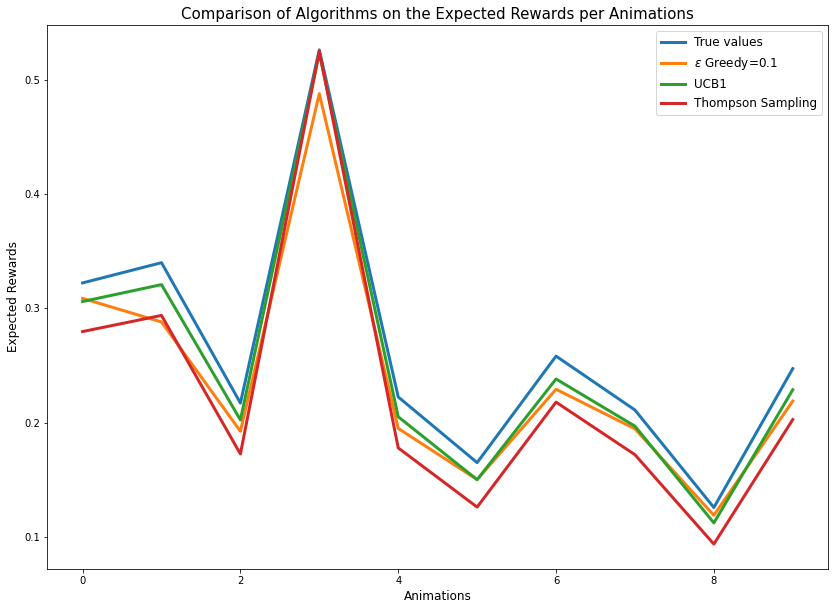

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(true_values, label="True values",linewidth=3)
plt.plot(q_eps_long, label="$\epsilon$ Greedy=0.1",linewidth=3)
plt.plot(q_ucb_long, label="UCB1",linewidth=3)
plt.plot(q_ts_long, label="Thompson Sampling",linewidth=3)

plt.xlabel("Animations",fontsize=12)
plt.ylabel("Expected Rewards",fontsize=12)
plt.title("Comparison of Algorithms on the Expected Rewards per Animations",fontsize=15)
plt.legend(fontsize=12)
plt.show()

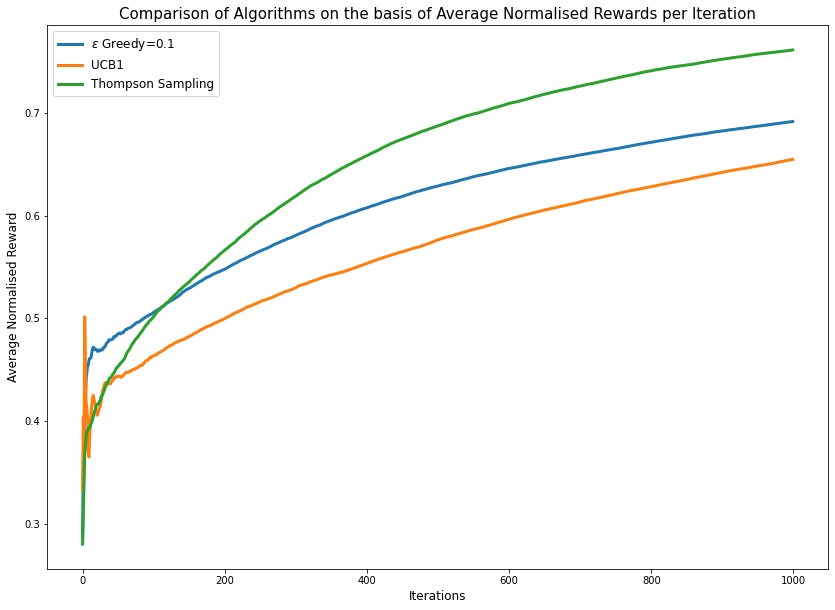

In [ ]:
plt.figure(figsize=(14,10))

plt.plot(avg_reward_eps_long, label="$\epsilon$ Greedy=0.1",linewidth=3)
plt.plot(avg_reward_ucb_long, label="UCB1",linewidth=3)
plt.plot(avg_reward_ts_long, label="Thompson Sampling",linewidth=3)

plt.xlabel("Iterations",fontsize=12)
plt.ylabel("Average Normalised Reward",fontsize=12)
plt.title("Comparison of Algorithms on the basis of Average Normalised Rewards per Iteration",fontsize=15)
plt.legend(fontsize=12)
plt.show()

[58, 53, 77]


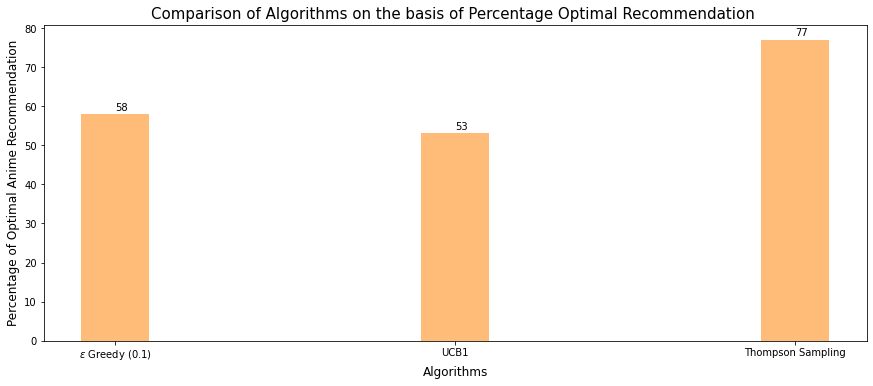

In [ ]:
# calculating the percentage anime recpmmendations of the most rewarding anime
algo= [ "$\epsilon$ Greedy (0.1)",
        "UCB1",
        "Thompson Sampling"
]

optimal_index=3

# calculating percentage arm pulls for each algorithm
percent_eps=round((anime_recom_number_eps_long[optimal_index]/np.sum(anime_recom_number_eps_long))*100)
percent_ucb=round((anime_recom_number_ucb_long[optimal_index]/np.sum(anime_recom_number_ucb_long))*100)
percent_ts=round((anime_recom_number_ts_long[optimal_index]/np.sum(anime_recom_number_ts_long))*100)

percent=[percent_eps,percent_ucb,percent_ts] 

# Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (12,5))
ax.bar(algo,percent,color="#ffbc79",width=0.2)

# So here index will give you x pos and data+1 will provide a little gap in y axis.
for index, data_ in enumerate(percent):
    plt.text(x=index , y =data_+1 , s=f"{data_}" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.xlabel("Algorithms",fontsize=12)
plt.ylabel("Percentage of Optimal Anime Recommendation",fontsize=12)
plt.title("Comparison of Algorithms on the basis of Percentage Optimal Recommendation ",fontsize=15)
plt.show()

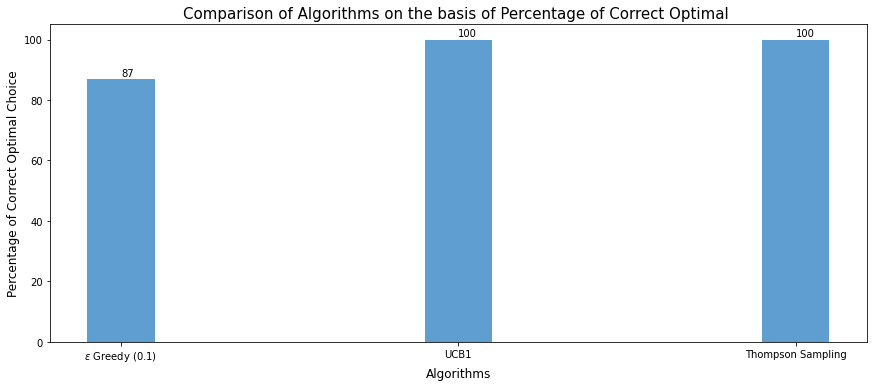

In [ ]:
algo= [ "$\epsilon$ Greedy (0.1)",
        "UCB1",
        "Thompson Sampling"]

optimal_index=3

# calculating percentage correct choices for best arm
per_eps=round((best_arm_eps[optimal_index]/np.sum(best_arm_eps))*100)
per_ucb=round((best_arm_ucb[optimal_index]/np.sum(best_arm_ucb))*100)
per_ts=round((best_arm_ts[optimal_index]/np.sum(best_arm_ts))*100)

percent=[per_eps,per_ucb,per_ts]
  
# Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (12,5))
ax.bar(algo,percent,color="#5f9ed1",width=0.2)

# So here index will give you x pos and data+1 will provide a little gap in y axis.
for index, data_ in enumerate(percent):
    plt.text(x=index , y =data_+1 , s=f"{data_}" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.xlabel("Algorithms",fontsize=12)
plt.ylabel("Percentage of Correct Optimal Choice",fontsize=12)
plt.title("Comparison of Algorithms on the basis of Percentage of Correct Optimal ",fontsize=15)
plt.show()